# Clustering 

**From the given ‘Iris’ dataset, we will predict the optimum number of clusters and will represent it visually.**

**IRIS DATASET**

**The Iris data set is the 'Hello world' in the field of data science.
This data sets consists of 3 different types of irises’ (Setosa, Versicolour, and Virginica) petal and sepal length, stored in a 150x4 numpy.ndarray.**

**The rows being the samples and the columns being: Sepal Length, Sepal Width, Petal Length and Petal Width.**

**You can read more about the dataset here: https://en.wikipedia.org/wiki/Iris_flower_data_set**

**The data set is often used in data mining, classification and clustering examples and to test algorithms.**



**First we start by importing important libraries to work with.**

In [1]:
import pandas as pd # to manipulate data using dataframes
import numpy as np  # to perform mathematical operations on arrays
from sklearn.cluster import KMeans # to perform K-means clustering

# to visualise the results
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import os # to establish interaction between the user and the operating system
os.chdir('C:\\Users\\User\\Downloads') # changing the directory 

In [3]:
# open the csv file containing Iris dataset and loading its contents into a pandas dataframe
data=pd.read_csv('Iris.csv', index_col='Id')
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# checking the details of the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.4+ KB


**From above we can see that there are total of 150 instances for each column and there are a total of 5 columns in this dataframe. The names ,the count and the datatypes of the columns are also given. There are no missing values in the dataframe.**

**We will now create a visualisation of sepal length and sepal width. After that we will be clustering the instances in the dataset based on these two features.**

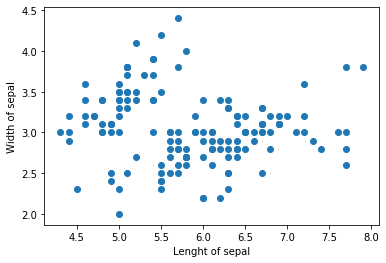

In [5]:
# Plot based on sepal_length and sepal_width
plt.scatter(data['SepalLengthCm'],data['SepalWidthCm'])

# name your axes
plt.xlabel('Lenght of sepal')
plt.ylabel('Width of sepal')
plt.show()

# Sepal Length and Sepal width

**We will now use only those columns which corresponds to the sepal data for clustering.**

In [6]:
# taking only the columns corresponding to the sepal data which in this case are the first two columns
x=data.iloc[:,0:2]
x

,SepalLengthCm,SepalWidthCm
Id,,
1,5.1,3.5
2,4.9,3.0
3,4.7,3.2
4,4.6,3.1
5,5.0,3.6
...,...,...
146,6.7,3.0
147,6.3,2.5
148,6.5,3.0


# SCALING THE DATA 

**Now that we have separated the required data into another dataframe we will do some preprocessing with it.
Preprocessing is the step that deals in modifying the data in order to make it more suitable for the machine to understand.**
 
**Here, we will standardize our data to bring all features in the same standing, we need to scale the data so that one significant number doesn’t impact the model just because of their large magnitude.**

In [7]:
# importing preprocessing module from sklearn
from sklearn import preprocessing

# scaling the data for better results
x_scaled = preprocessing.scale(x)
x_scaled

array([[-0.90068117,  1.03205722],
       [-1.14301691, -0.1249576 ],
       [-1.38535265,  0.33784833],
       [-1.50652052,  0.10644536],
       [-1.02184904,  1.26346019],
       [-0.53717756,  1.95766909],
       [-1.50652052,  0.80065426],
       [-1.02184904,  0.80065426],
       [-1.74885626, -0.35636057],
       [-1.14301691,  0.10644536],
       [-0.53717756,  1.49486315],
       [-1.26418478,  0.80065426],
       [-1.26418478, -0.1249576 ],
       [-1.87002413, -0.1249576 ],
       [-0.05250608,  2.18907205],
       [-0.17367395,  3.11468391],
       [-0.53717756,  1.95766909],
       [-0.90068117,  1.03205722],
       [-0.17367395,  1.72626612],
       [-0.90068117,  1.72626612],
       [-0.53717756,  0.80065426],
       [-0.90068117,  1.49486315],
       [-1.50652052,  1.26346019],
       [-0.90068117,  0.56925129],
       [-1.26418478,  0.80065426],
       [-1.02184904, -0.1249576 ],
       [-1.02184904,  0.80065426],
       [-0.7795133 ,  1.03205722],
       [-0.7795133 ,

# **The Elbow Method**

**A fundamental step for any unsupervised algorithm is to determine the optimal number of clusters into which the data may be clustered. The Elbow Method is one of the most popular methods to determine this optimal value of k.**

**The idea behind elbow method is to run k-means clustering on a given dataset for a range of values of k (num_clusters, e.g k=1 to 10), and for each value of k, calculate sum of squared errors (SSE, also called distortion or inertia). After that, a line graph is plotted with SSE  corresponding to each k value along the y-axis and k values along x-axis.To determine the optimal number of clusters, we have to select the value of k at the “elbow” i.e. the point after which the SSE/inertia start decreasing in a linear fashion.**


C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


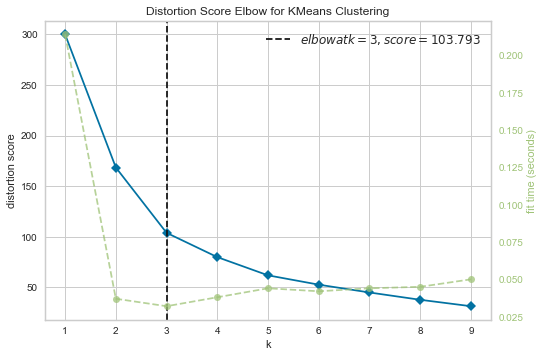

In [8]:
# here we are using the yellowbricks library that makes our work easier.
from yellowbrick.cluster import KElbowVisualizer
visualizer = KElbowVisualizer(KMeans(), k=(1,10))
visualizer.fit(x_scaled) # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure
plt.show()

**From the above graph we can see that the number of cluster should be 3 as this is the pointon elbow.**

# CLUSTERING THE DATA

**We will now use k=3 for performing clustering.**

In [9]:
# using Kmeans clustering
kmeans1=KMeans(3)
kmeans1.fit(x_scaled) # notice that we have used the scaled data to fit the model


# creating a copy of our dataframe to work with and modify
cluster=data.copy()
# adding another column to our copied data frame called 'cluster_predicted_scaled_sepal' which stores the result of our 
# clustering model
cluster['cluster_predicted_scaled_sepal']=kmeans1.fit_predict(x_scaled)

**We will now visualise our clustering based on Sepal Length and Sepal Width using a scatter plot.**

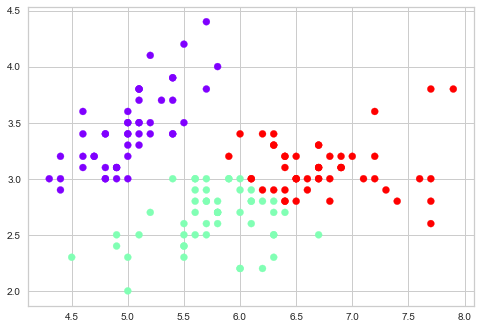

In [10]:
# plotting our data reflecting our clustering.
plt.scatter(cluster['SepalLengthCm'], cluster['SepalWidthCm'], c= cluster['cluster_predicted_scaled_sepal'], cmap = 'rainbow')
plt.show()

In [11]:
# finding the unique values of species in the dataset.
data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

**we can see that there are only three species of the Iris (Iris-Setosa, Iris-Versicolor and Iris-Virginica) and thus it verifies our clustering into 3 clusters.**

# **PETAL LENGTH and PETAL WIDTH**

**Similarly, we will now use only those columns which corresponds to the petal data for clustering.**

In [12]:
# taking only the columns corresponding to the petal data which in this case are the second and the third columns.
y=data.iloc[:,2:4]
y

,PetalLengthCm,PetalWidthCm
Id,,
1,1.4,0.2
2,1.4,0.2
3,1.3,0.2
4,1.5,0.2
5,1.4,0.2
...,...,...
146,5.2,2.3
147,5.0,1.9
148,5.2,2.0


# SCALING THE DATA 

In [13]:
# scaling the data for better results
y_scaled = preprocessing.scale(y)
y_scaled

array([[-1.34127240e+00, -1.31297673e+00],
       [-1.34127240e+00, -1.31297673e+00],
       [-1.39813811e+00, -1.31297673e+00],
       [-1.28440670e+00, -1.31297673e+00],
       [-1.34127240e+00, -1.31297673e+00],
       [-1.17067529e+00, -1.05003079e+00],
       [-1.34127240e+00, -1.18150376e+00],
       [-1.28440670e+00, -1.31297673e+00],
       [-1.34127240e+00, -1.31297673e+00],
       [-1.28440670e+00, -1.44444970e+00],
       [-1.28440670e+00, -1.31297673e+00],
       [-1.22754100e+00, -1.31297673e+00],
       [-1.34127240e+00, -1.44444970e+00],
       [-1.51186952e+00, -1.44444970e+00],
       [-1.45500381e+00, -1.31297673e+00],
       [-1.28440670e+00, -1.05003079e+00],
       [-1.39813811e+00, -1.05003079e+00],
       [-1.34127240e+00, -1.18150376e+00],
       [-1.17067529e+00, -1.18150376e+00],
       [-1.28440670e+00, -1.18150376e+00],
       [-1.17067529e+00, -1.31297673e+00],
       [-1.28440670e+00, -1.05003079e+00],
       [-1.56873522e+00, -1.31297673e+00],
       [-1.

# CLUSTERING THE DATA

In [14]:
# using Kmeans clustering
kmeans2=KMeans(3)
kmeans2.fit(y_scaled)

# adding another column to our copied data frame called 'cluster_predicted_scaled_petal' which stores the result of our 
# clustering model
cluster['cluster_predicted_scaled_petal']=kmeans2.fit_predict(y_scaled)

**We will now visualise our clustering based on Petal Length and Petal Width using a scatter plot.**

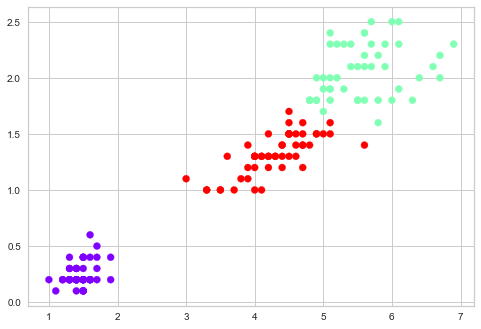

In [15]:
# plotting our data reflecting our clustering.
plt.scatter(cluster['PetalLengthCm'], cluster['PetalWidthCm'], c= cluster['cluster_predicted_scaled_petal'], cmap = 'rainbow')
plt.show()

# **Both Sepal and Petal**

In [16]:
# taking only the columns corresponding to both the sepal and petal data which in this case are column 0 to 3.
z=data.iloc[:,0:4]
z

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,,,,
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2
...,...,...,...,...
146,6.7,3.0,5.2,2.3
147,6.3,2.5,5.0,1.9
148,6.5,3.0,5.2,2.0


# SCALING THE DATA

In [17]:
# scaling the data for better results
z_scaled = preprocessing.scale(z)
z_scaled

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

# CLUSTERING THE DATA 

In [18]:
# using Kmeans clustering
kmeans=KMeans(3)
kmeans.fit(z_scaled)

# adding another column to our copied data frame called 'cluster_predicted_scaled' which stores the result of our 
# clustering model
cluster['cluster_predicted_scaled']=kmeans.fit_predict(z_scaled)

**We can see all of our clustering results in one place in our dataframe.**

In [19]:
# displaying the dataframe with all the clustering result.
cluster

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster_predicted_scaled_sepal,cluster_predicted_scaled_petal,cluster_predicted_scaled
Id,,,,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa,0,0,1
2,4.9,3.0,1.4,0.2,Iris-setosa,0,0,1
3,4.7,3.2,1.3,0.2,Iris-setosa,0,0,1
4,4.6,3.1,1.5,0.2,Iris-setosa,0,0,1
5,5.0,3.6,1.4,0.2,Iris-setosa,0,0,1
...,...,...,...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica,2,1,2
147,6.3,2.5,5.0,1.9,Iris-virginica,1,1,0
148,6.5,3.0,5.2,2.0,Iris-virginica,2,1,2


In [20]:
cluster['cluster_predicted_scaled'].unique()

array([1, 2, 0])

**We will now visualise our clustering based on Sepal and Petal data using a scatter plot.**

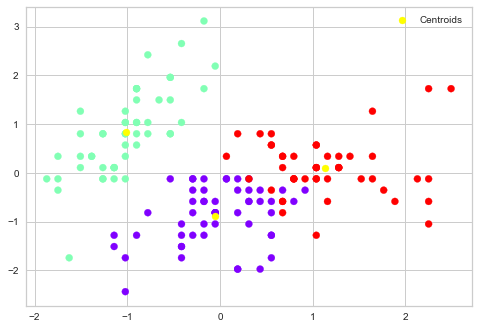

In [21]:
# plotting our Sepal data reflecting our clustering along with their cluster centers.
plt.scatter(z_scaled[:,0],z_scaled[:,1],c=cluster['cluster_predicted_scaled'], cmap = 'rainbow')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
             c = 'yellow', label = 'Centroids')
plt.legend()
plt.show()

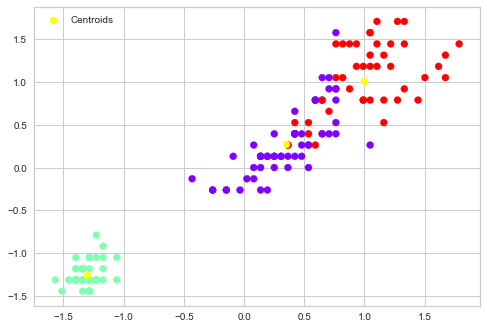

In [22]:
# plotting our Petal data reflecting our clustering along with their cluster centers.
plt.scatter(z_scaled[:,2],z_scaled[:,3],c=cluster['cluster_predicted_scaled'], cmap = 'rainbow')
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:,3], 
             c = 'yellow', label = 'Centroids')
plt.legend()
plt.show()

Try it yourself!